In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data (1).csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [9]:
df['Дата'] = pd.to_datetime(df['Дата'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB


Сгруппируйте данные по дате, посчитайте количество продаж

In [11]:
grouped_df = df.groupby('Дата')['Количество'].sum()

Вывести несколько первых строк сгруппированных данных

In [12]:
grouped_df.head()

Дата
2018-01-04    3734
2018-01-05    3643
2018-01-06    3193
2018-01-07    3298
2018-01-09    4055
Name: Количество, dtype: int64

Нарисуйте график продаж у `grouped_df`

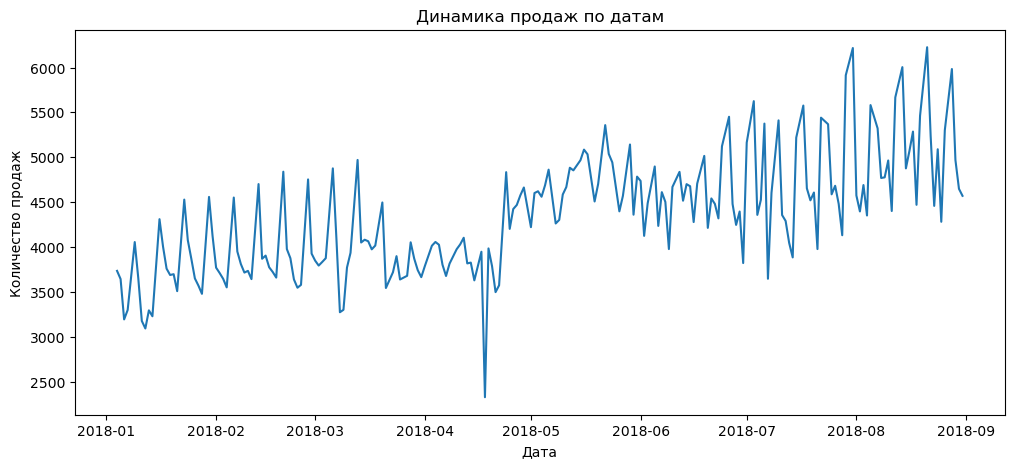

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(grouped_df.index, grouped_df.values)
plt.title('Динамика продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

**На графике видно, что продажи в целом растут со временем. Также заметны регулярные колебания и отдельные резкие снижения в некоторые даты, что может быть связано с внешними факторами. Для более точных выводов требуется дополнительный анализ.**

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [16]:
df.loc[df['Количество'].idxmax()]

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object

Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [17]:
df_3_warehouse = df[df['Склад'] == 3]
df_summer = df_3_warehouse[df_3_warehouse['Дата'].dt.month.isin([6, 7, 8])]
df_wednesday = df_summer[df_summer['Дата'].dt.weekday == 2]
product_sales = (df_wednesday.groupby('Номенклатура')['Количество'].sum())
top_product = product_sales.idxmax()
top_sales = product_sales.max()

top_product, top_sales

('product_1', 2267)

Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [51]:
weather = pd.read_csv('weather (2).csv', sep=';')
weather.head()

,Дата,T
0,31.08.2018,"9,6"
1,31.08.2018,"11,3"
2,31.08.2018,"12,3"
3,31.08.2018,"13,2"
4,31.08.2018,"12,5"


In [52]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Дата    1918 non-null   object
 1   T       1918 non-null   object
dtypes: object(2)
memory usage: 30.1+ KB


In [53]:
weather['Дата'] = pd.to_datetime(weather['Дата'], dayfirst=True)
weather['T'] = weather['T'].astype(str).str.replace(',', '.', regex=False)
weather['T'] = pd.to_numeric(weather['T'], errors='coerce')

weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Дата    1918 non-null   datetime64[ns]
 1   T       1918 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.1 KB


,Дата,T
0,2018-08-31,9.6
1,2018-08-31,11.3
2,2018-08-31,12.3
3,2018-08-31,13.2
4,2018-08-31,12.5


In [54]:
weather_daily = weather.groupby('Дата', as_index=False)['T'].mean()
weather_daily.head()

,Дата,T
0,2018-01-04,-13.0875
1,2018-01-05,-17.2500
2,2018-01-06,-14.1250
3,2018-01-07,-12.3375
4,2018-01-08,-15.4375


In [55]:
sales_daily = grouped_df.reset_index()
sales_daily.columns = ['Дата', 'Количество продаж']

sales_daily['Дата'] = pd.to_datetime(sales_daily['Дата'])
sales_daily.head()

,Дата,Количество продаж
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


In [56]:
merged_df = pd.merge(sales_daily, weather_daily, on='Дата', how='inner')
merged_df.head()

,Дата,Количество продаж,T
0,2018-01-04,3734,-13.0875
1,2018-01-05,3643,-17.2500
2,2018-01-06,3193,-14.1250
3,2018-01-07,3298,-12.3375
4,2018-01-09,4055,-7.3875


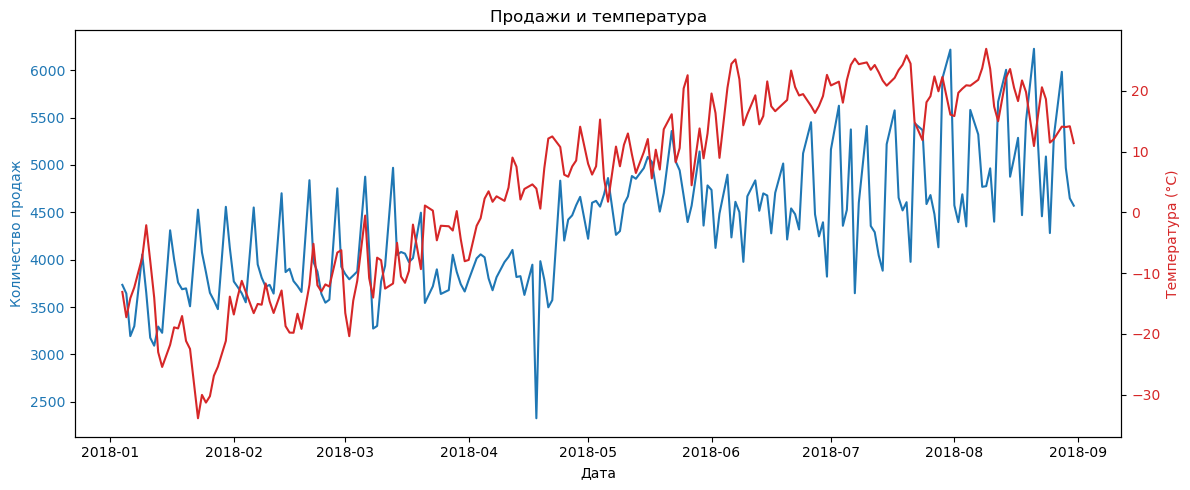

In [65]:
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(merged_df['Дата'], merged_df['Количество продаж'], label='Количество продаж', color='tab:blue')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(merged_df['Дата'], merged_df['T'], label='Температура', color='tab:red')
ax2.set_ylabel('Температура (°C)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Продажи и температура')
fig.tight_layout()
plt.show()

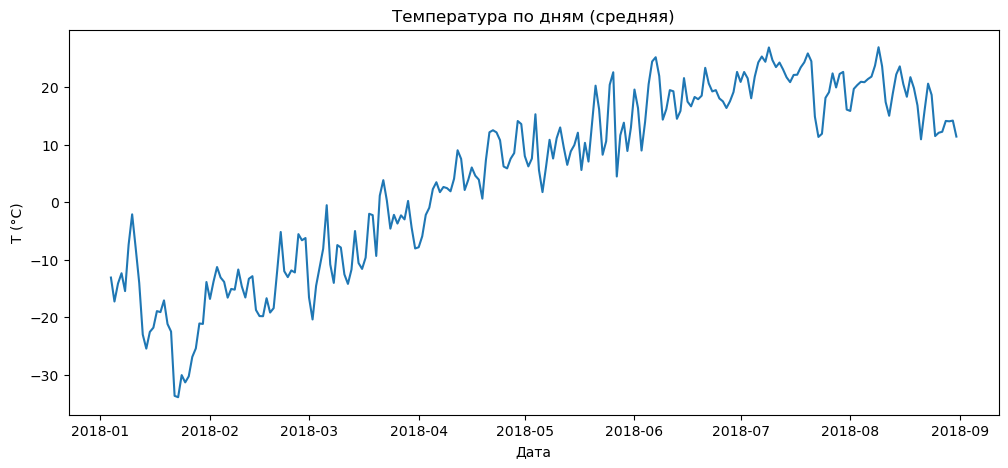

In [60]:
plt.figure(figsize=(12, 5))
plt.plot(weather_daily['Дата'], weather_daily['T'])
plt.title('Температура по дням (средняя)')
plt.xlabel('Дата')
plt.ylabel('T (°C)')
plt.show()